<a href="https://colab.research.google.com/github/debbor5/tpdatasetfinal2/blob/main/tp_debora_bordon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Educacion en República Argentina- 2023

#### El presente proyecto tiene como objetivo analizar la situación educativa en la República Argentina a partir de datos obtenidos del portal oficial del Gobierno de la Nación Argentina: https://datos.gob.ar/dataset. El estudio se basa en los diez principales centros urbanos del país, determinados según el Censo Nacional de Población, Hogares y Viviendas 2022, elaborado por el Instituto Nacional de Estadística y Censos (INDEC).
#### Estos aglomerados: Gran Buenos Aires, Ciudad Autónoma de Buenos Aires, Ciudad de Córdoba Capital, Rosario, Ciudad de Mendoza Capital, San Miguel de Tucumán, Ciudad de Santa Fe Capital, La Plata, Ciudad de Salta Capital y General Pueyrredon, concentran la mayor parte de la población nacional y reflejan la diversidad social, económica y cultural del territorio argentino.
#### El análisis se orienta a examinar la relación entre edad, grado escolar y tipo de institución educativa (estatal o privada), con el propósito de identificar diferencias y patrones en el ingreso al sistema educativo de la población. Para esto, se procederá al análisis de la base de datos que incluye la totalidad de las matrículas de inscripciones de la población estudiantil en el año 2023. La información se encuentra clasificadas por provincia, departamento, sector de gestión, ámbito, y grado en el cual se efectuó la inscripción.
#### De este modo, y luego de proceder a la limpieza, normalización, análisis y mediante diversos gráficos, se busca aportar una visión integral sobre las desigualdades y desafíos que enfrenta la educación en los principales núcleos urbanos del país, contribuyendo al desarrollo de políticas y estrategias que promuevan una mayor equidad educativa.


## Hipótesis

#### En los centro urbanos con mayor desarrollo económico, la proporción de matrículas en instituciones privadas es significativamente mayor que en los centros urbanos con menor desarrollo.

## Objetivo General

#### Analizar cómo varia la elección del tipo de gestión educativa (pública o privada) según el centro urbano, considerando la edad y el grado de los alumnos inscriptos

## Objetivos Específicos

#### 1. Comparar la proporción de alumnos inscriptos en gestión privada versus la gestión estatal.
#### 2. Evaluar si la edad o el grado de los alumnos se asocia con un tipo de gestión en particular.
#### 3. Identificar patrones de desigualdad en el acceso a la educación pública y privada de acuerdo a la locación.

In [15]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df= pd.read_csv("https://raw.githubusercontent.com/debbor5/tpdatasetfinal2/refs/heads/main/2023%20Matricula%20por%20edad%20en%20principales%20centros%20urbanos.csv" , sep= ";" )


In [6]:
print(df.head())

      provincia     departamento   sector  ambito    grado  0años   1año  \
0  Buenos Aires  ALMIRANTE BROWN  Estatal  Urbano       1°                 
1  Buenos Aires  ALMIRANTE BROWN  Estatal  Urbano      10°                 
2  Buenos Aires  ALMIRANTE BROWN  Estatal  Urbano      11°                 
3  Buenos Aires  ALMIRANTE BROWN  Estatal  Urbano      12°                 
4  Buenos Aires  ALMIRANTE BROWN  Estatal  Urbano  13°/14°                 

   2años  3años  4años  ... 21años 22años 23años 24años 25años 26años 27años  \
0                       ...                                                    
1                       ...                                                    
2                       ...                                                    
3                       ...                                                    
4                       ...                                                    

  28años 29años 30añosymás  
0                           
1   

In [7]:
df.shape

(2008, 36)

In [8]:
df.columns

Index(['provincia', 'departamento', 'sector', 'ambito', 'grado', '0años',
       '1año', '2años', '3años', '4años', '5años', '6años', '7años', '8años',
       '9años', '10años', '11años', '12años', '13años', '14años', '15años',
       '16años', '17años', '18años', '19años', '20años', '21años', '22años',
       '23años', '24años', '25años', '26años', '27años', '28años', '29años',
       '30añosymás'],
      dtype='object')

In [10]:
# Genero una lista de columnas para utilizar en mi DataFrame
# Convierto cualquier valor inválido a NAN
# Reemplazo los NAN por 0 (cero)
# Finalmente convierto todos los números a tipo enteros


cols = ["0años", "1año", "2años", "3años","4años", "5años", "6años", "7años", "8años", "9años", "10años", "11años", "12años", "13años", "14años", "15años", "16años", "17años", "18años", "19años", "20años", "21años", "22años", "23años", "24años", "25años", "26años", "27años", "28años", "29años", "30añosymás"]

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

print (df[cols])

      0años  1año  2años  3años  4años  5años  6años  7años  8años  9años  \
0         0     0      0      0      0      0   5842     19      2      0   
1         0     0      0      0      0      0      0      0      0      0   
2         0     0      0      0      0      0      0      0      0      0   
3         0     0      0      0      0      0      0      0      0      0   
4         0     0      0      0      0      0      0      0      0      0   
...     ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
2003      0     0    787      0      0      0      0      0      0      0   
2004      0     0      0   1752      2      0      0      0      0      0   
2005      0     0      0      0   3139      2      0      0      0      0   
2006      0     0      0      0      0   2795      0      0      0      0   
2007      0     0      0      0      0      0      0      0      0      0   

      ...  21años  22años  23años  24años  25años  26años  27años  28años  

In [11]:
df.dtypes

,0
provincia,object
departamento,object
sector,object
ambito,object
grado,object
0años,int64
1año,int64
2años,int64
3años,int64
4años,int64


In [12]:
# Creo una columna llamada total donde se suman las columnas con cantidad de alumnos

df["total"] = df[cols].sum(axis=1)

print (df["total"])

0       5863
1       6260
2       5617
3       4718
4        313
        ... 
2003     787
2004    1754
2005    3141
2006    2795
2007    9585
Name: total, Length: 2008, dtype: int64


In [37]:
sns.set_theme(style="darkgrid")

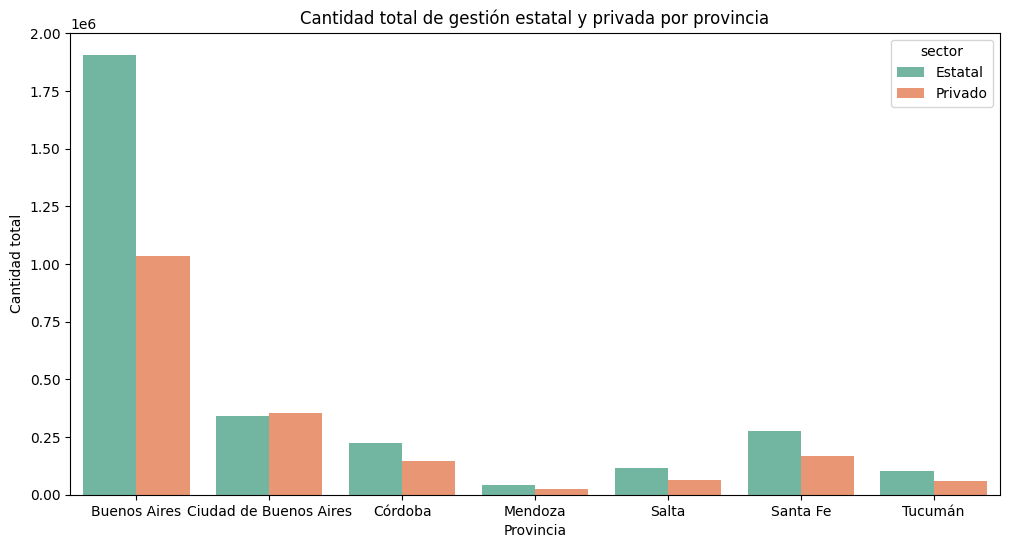

In [42]:
# Agrupo por provincia y sector, y sumo la columna total creada en el paso anterior
# Genero el grafico de barras

df_agrupado = (df.groupby(["provincia", "sector"], as_index=False).agg({"total": "sum"}))

plt.figure(figsize=(12,6))
sns.barplot(data=df_agrupado,
    x="provincia",
    y="total",
    hue="sector",
    palette="Set2")

plt.title("Cantidad total de gestión estatal y privada por provincia")
plt.ylabel("Cantidad total")
plt.xlabel("Provincia")
plt.show()
